### Import modules

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### Load the cleaned dataset and scale the numerical values

In [3]:
diabetes = pd.read_csv("diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

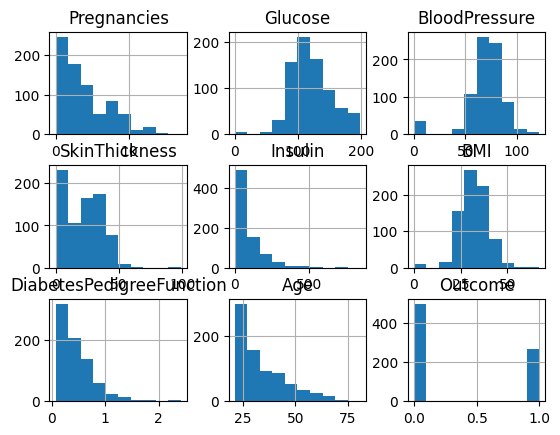

In [6]:
diabetes.hist()

<AxesSubplot:>

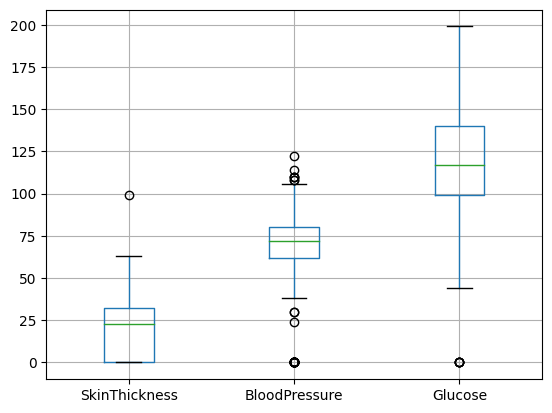

In [8]:
diabetes[["SkinThickness", "BloodPressure", "Glucose"]].boxplot()

<AxesSubplot:>

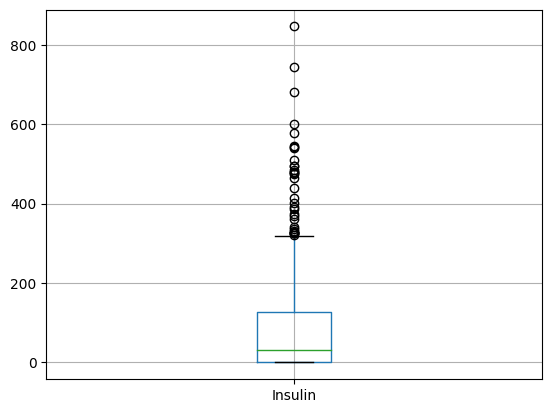

In [9]:
diabetes[["Insulin"]].boxplot()

<AxesSubplot:>

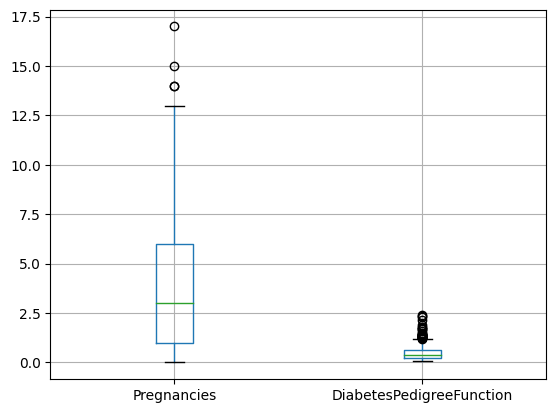

In [11]:
diabetes[["Pregnancies", "DiabetesPedigreeFunction"]].boxplot()

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

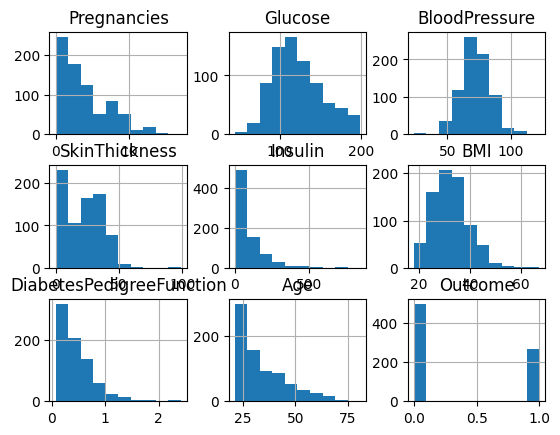

In [12]:
columns_with_invalid_zeros = ["Glucose", "BloodPressure", "BMI"]
for col in columns_with_invalid_zeros:
    diabetes[col] = diabetes[col].replace(0, diabetes[col].median())  # Replace zeros with median value

diabetes.hist()

In [15]:
# Select numerical columns to scale
numeric_features = ["Glucose", "BloodPressure", "BMI", "Insulin", "Age", "Pregnancies", "SkinThickness", "DiabetesPedigreeFunction"]

# Apply Standardization (Z-score)
scaler = MinMaxScaler()
diabetes[numeric_features] = scaler.fit_transform(diabetes[numeric_features])

diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.353535,0.000000,0.314928,0.234415,0.483333,1
1,0.058824,0.264516,0.428571,0.292929,0.000000,0.171779,0.116567,0.166667,0
2,0.470588,0.896774,0.408163,0.000000,0.000000,0.104294,0.253629,0.183333,1
3,0.058824,0.290323,0.428571,0.232323,0.111111,0.202454,0.038002,0.000000,0
4,0.000000,0.600000,0.163265,0.353535,0.198582,0.509202,0.943638,0.200000,1


<AxesSubplot:>

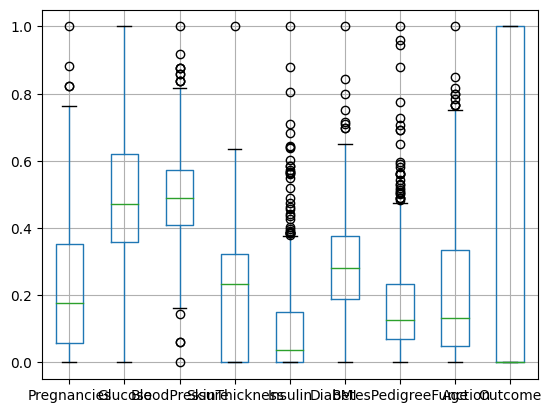

In [17]:
diabetes.boxplot()

<AxesSubplot:>

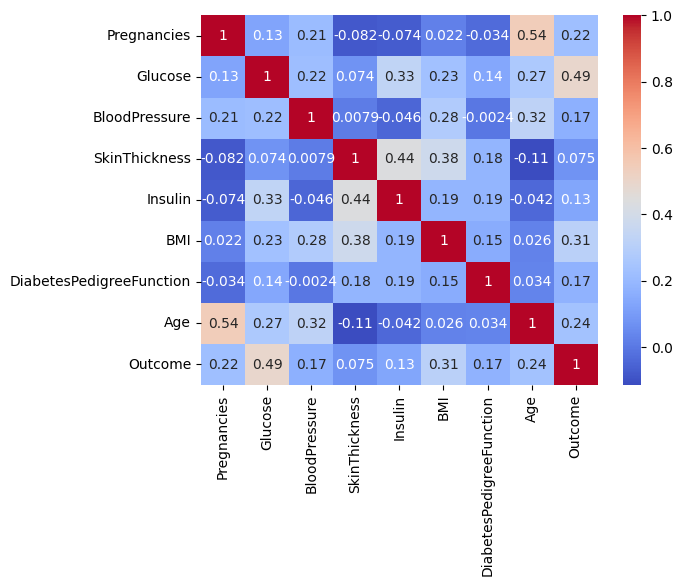

In [18]:
sns.heatmap(diabetes.corr(), annot=True, cmap="coolwarm")

### Define features and target variables

In [ ]:
x_lin = diabetes[["Age", "BMI","BloodPressure"]]
y_lin = diabetes[["Glucose"]]

In [31]:
x = diabetes[["Age", "BMI","BloodPressure", "Glucose"]]
y = diabetes[["Outcome"]]

### Split the dataset into training and testing data

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x_lin, y_lin, test_size=0.2, random_state=42)

### Train and evaluate the models

In [30]:
lin_reg = LinearRegression().fit(X_train, y_train)
y_pred_glucose = lin_reg.predict(X_test)
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_glucose))
print("R² Score:", r2_score(y_test, y_pred_glucose))

Linear Regression MSE: 0.03719333863963021
R² Score: 0.1120322187788294


In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [33]:
log_reg = LogisticRegression().fit(X_train, y_train)
y_pred_risk = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_risk))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_risk))
print("Classification Report:\n", classification_report(y_test, y_pred_risk))

Logistic Regression Accuracy: 0.7532467532467533
Confusion Matrix:
 [[84 15]
 [23 32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82        99
           1       0.68      0.58      0.63        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
dtree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
print("Decision Tree Accuracy:", accuracy_score(y_test, dtree.predict(X_test)))

Decision Tree Accuracy: 0.7727272727272727


In [55]:
rf = RandomForestClassifier(max_depth=2, n_estimators=100, min_samples_leaf=6).fit(X_train, y_train)
print("Random Forest Accuracy:", accuracy_score(y_test, rf.predict(X_test)))

Random Forest Accuracy: 0.7792207792207793


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
